In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/german.csv')
df.head(5)

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,...,property,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,target
0,below_0,6,risky_acc_or_curr_loan_other,radio_tv,1169,unknown_no_saving_acc,above_7y,4,male:single,none,...,real_estate,67,none,own,2,skilled_official,1,yes,yes,good
1,below_200,48,curr_loans_paid_duly,radio_tv,5951,below_100,below_4y,2,female:divorced_or_married,none,...,real_estate,22,none,own,1,skilled_official,1,no,yes,bad
2,no_cheking_acc,12,risky_acc_or_curr_loan_other,education,2096,below_100,below_7y,2,male:single,none,...,real_estate,49,none,own,1,unskilled_resident,2,no,yes,good
3,below_0,42,curr_loans_paid_duly,furniture_equipment,7882,below_100,below_7y,2,male:single,guarantor,...,life_insurance_or_aggreements,45,none,for_free,1,skilled_official,2,no,yes,good
4,below_0,24,delay_in_past,car_new,4870,below_100,below_4y,3,male:single,none,...,unknown_or_no_property,53,none,for_free,2,skilled_official,2,no,yes,bad


In [ ]:
df.shape

(1000, 21)

In [ ]:
df.describe()

,duration,loan_amt,installment_rate,present_residence_since,age,num_curr_loans,num_people_provide_maint
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
df.isnull().sum()

,0
checking_acc_status,0
duration,0
cred_hist,0
purpose,0
loan_amt,0
saving_acc_bonds,0
present_employment_since,0
installment_rate,0
personal_stat_gender,0
other_debtors_guarantors,0


In [ ]:
cont_df = df.select_dtypes(include=['int', 'float'])
cato_df = df.select_dtypes(include=['object'])
print(cont_df.columns)
print(cato_df.columns)

Index(['duration', 'loan_amt', 'installment_rate', 'present_residence_since',
       'age', 'num_curr_loans', 'num_people_provide_maint'],
      dtype='object')
Index(['checking_acc_status', 'cred_hist', 'purpose', 'saving_acc_bonds',
       'present_employment_since', 'personal_stat_gender',
       'other_debtors_guarantors', 'property', 'other_installment_plans',
       'housing', 'job', 'telephone', 'is_foreign_worker', 'target'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(cont_df)
df_scaled = pd.DataFrame(df_scaled, columns=cont_df.columns)
display(df_scaled.head())

,duration,loan_amt,installment_rate,present_residence_since,age,num_curr_loans,num_people_provide_maint
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first') # Set sparse_output to False and drop first category
df_encoded = encoder.fit_transform(cato_df.drop('target', axis=1)) # Drop target before encoding
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(cato_df.drop('target', axis=1).columns)) # Use get_feature_names_out
display(df_encoded.head())

,checking_acc_status_below_0,checking_acc_status_below_200,checking_acc_status_no_cheking_acc,cred_hist_delay_in_past,cred_hist_no_loan_or_paid_duly_other,cred_hist_paid_duly_this_bank,cred_hist_risky_acc_or_curr_loan_other,purpose_car_new,purpose_car_used,purpose_domestic_applience,...,property_unknown_or_no_property,other_installment_plans_none,other_installment_plans_store,housing_own,housing_rent,job_skilled_official,job_unemployed_non_resident,job_unskilled_resident,telephone_yes,is_foreign_worker_yes
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])
df['target']

,target
0,1
1,0
2,1
3,1
4,0
...,...
995,1
996,1
997,1
998,0


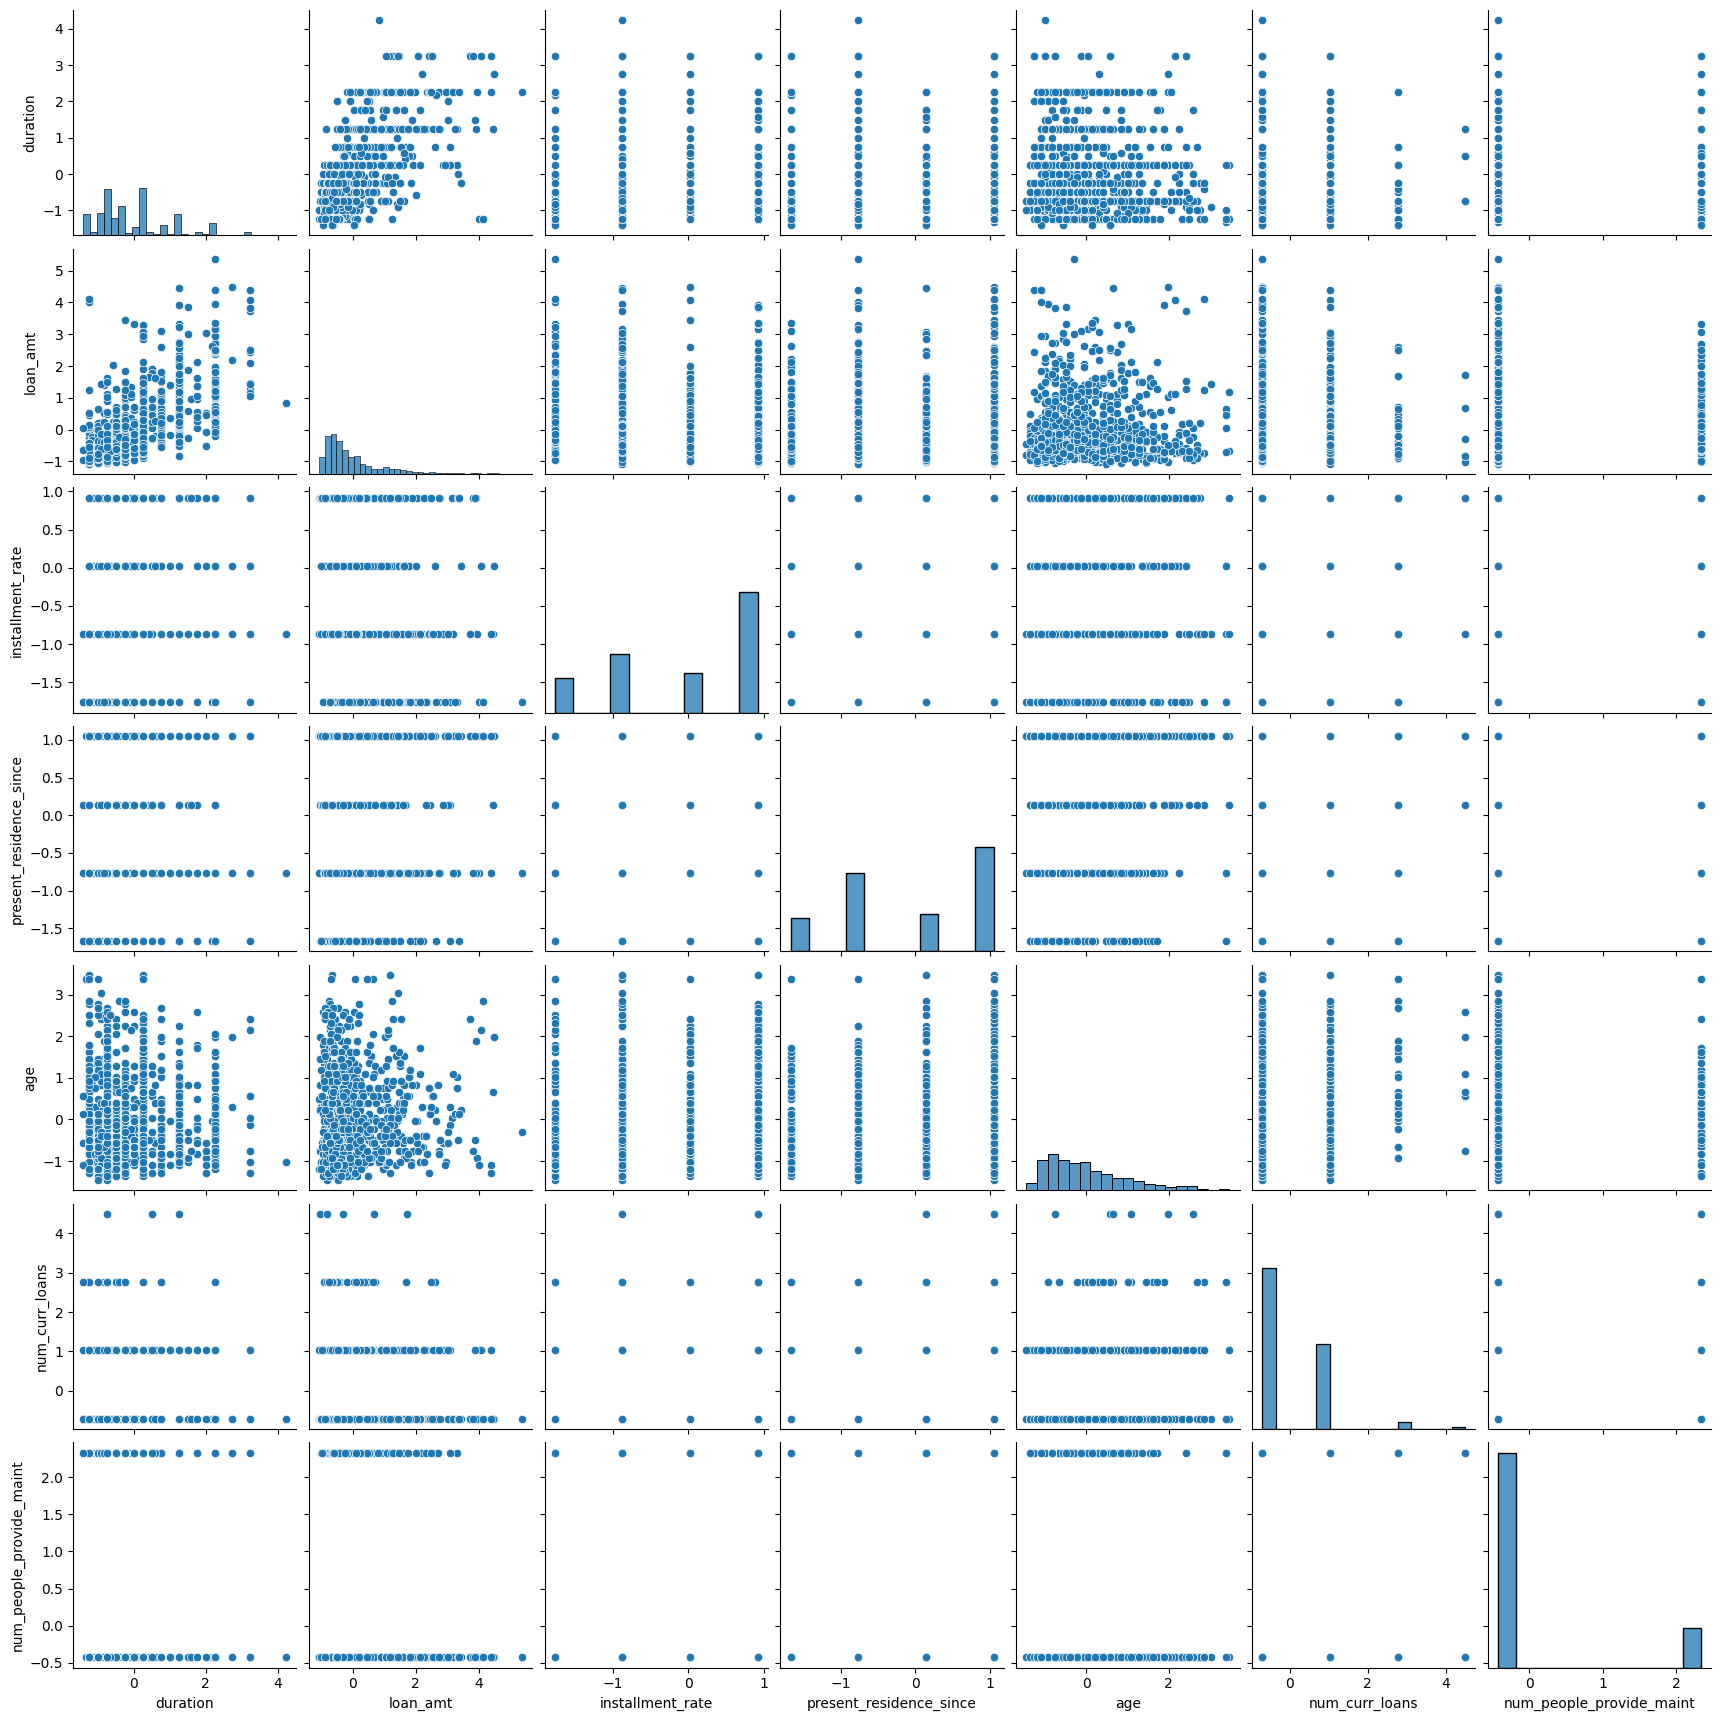

In [ ]:
sns.pairplot(df_scaled)
plt.show()

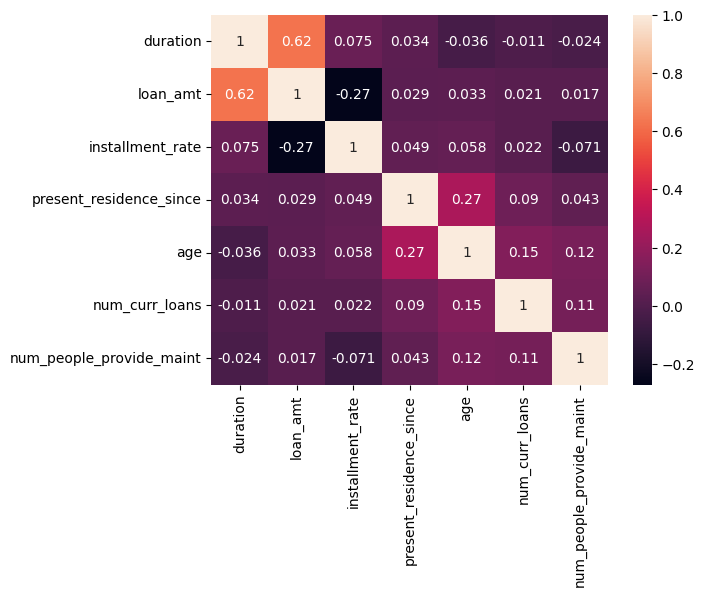

In [ ]:
sns.heatmap(df_scaled.corr(), annot=True)
plt.show()

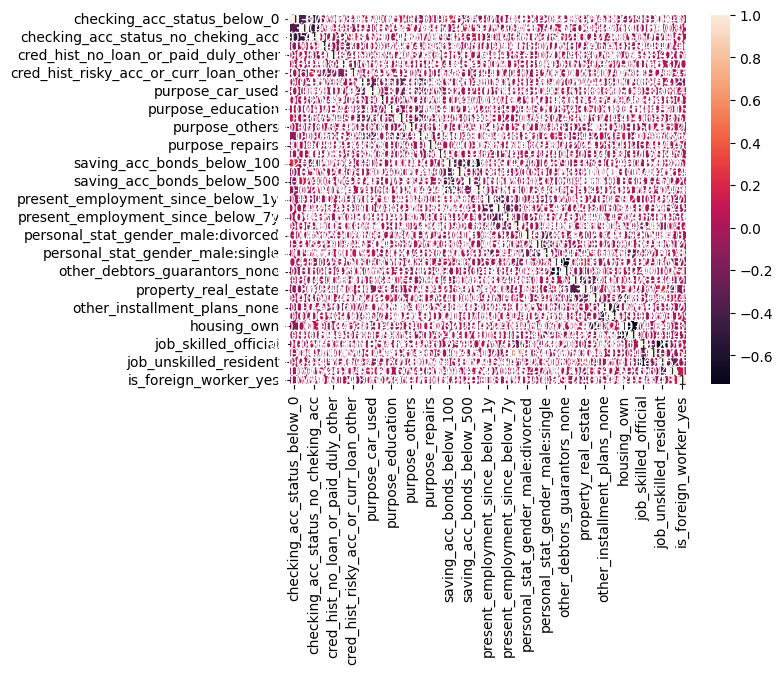

In [ ]:
sns.heatmap(df_encoded.corr(), annot=True)
plt.show()

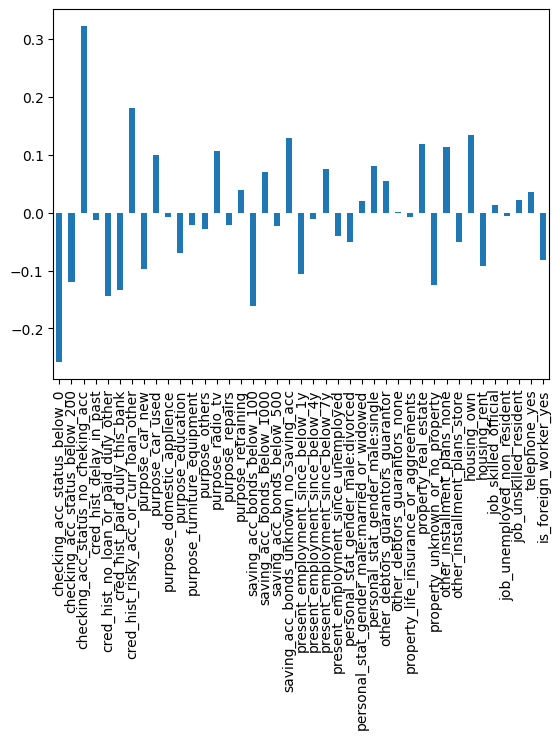

In [ ]:
df_encoded.corrwith(df['target']).plot(kind='bar')
plt.show()

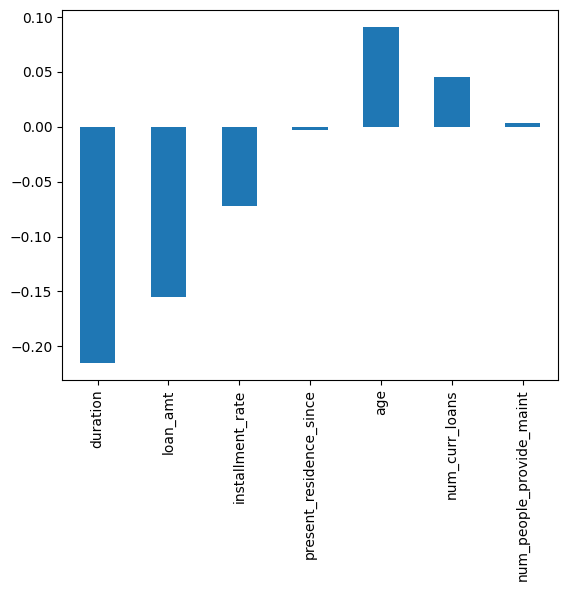

In [ ]:
df_scaled.corrwith(df['target']).plot(kind='bar')
plt.show()

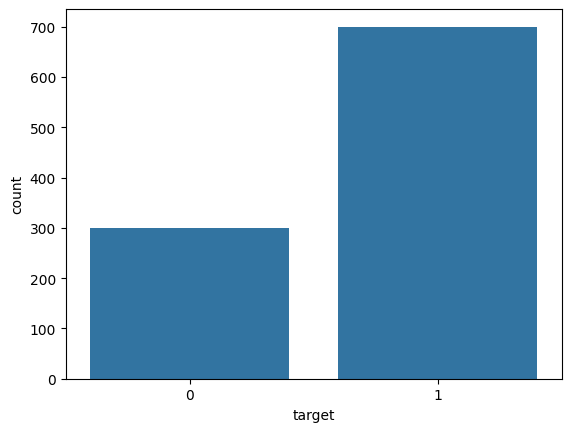

In [ ]:
sns.countplot(x='target', data=df)
plt.show()

In [ ]:
# I droped the original categorical and continuous features and concatenated the processed ones
X = pd.concat([df_scaled, df_encoded], axis=1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8
Confusion Matrix:
 [[ 33  26]
 [ 14 127]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.56      0.62        59
           1       0.83      0.90      0.86       141

    accuracy                           0.80       200
   macro avg       0.77      0.73      0.74       200
weighted avg       0.79      0.80      0.79       200



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.68
Confusion Matrix:
 [[ 28  31]
 [ 33 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.47      0.47        59
           1       0.78      0.77      0.77       141

    accuracy                           0.68       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.68      0.68      0.68       200



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8
Confusion Matrix:
 [[ 29  30]
 [ 10 131]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.49      0.59        59
           1       0.81      0.93      0.87       141

    accuracy                           0.80       200
   macro avg       0.78      0.71      0.73       200
weighted avg       0.79      0.80      0.79       200



In [ ]:
from sklearn.metrics import classification_report, accuracy_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Extract metrics for the positive class (assuming 1 is the positive class)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']

    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1-score': f1
    }

    return metrics

In [ ]:
results = []
results.append(evaluate_model(lr, X_train, X_test, y_train, y_test))
results.append(evaluate_model(dt, X_train, X_test, y_train, y_test))
results.append(evaluate_model(rf, X_train, X_test, y_train, y_test))

In [ ]:
results_df = pd.DataFrame(results)
results_df.index = ['Logistic Regression', 'Decision Tree', 'Random Forest']
display(results_df)
results_df = results_df.reset_index() # Reset the index to make model names a column
best_model_row = results_df.loc[results_df['f1-score'].idxmax()]
best_model_name = best_model_row['index']
print(f"The best performing model based on F1-score is: {best_model_name}")

,accuracy,precision,recall,f1-score
Logistic Regression,0.800,0.830065,0.900709,0.863946
Decision Tree,0.670,0.769784,0.758865,0.764286
Random Forest,0.785,0.791667,0.943262,0.860841


The best performing model based on F1-score is: Logistic Regression


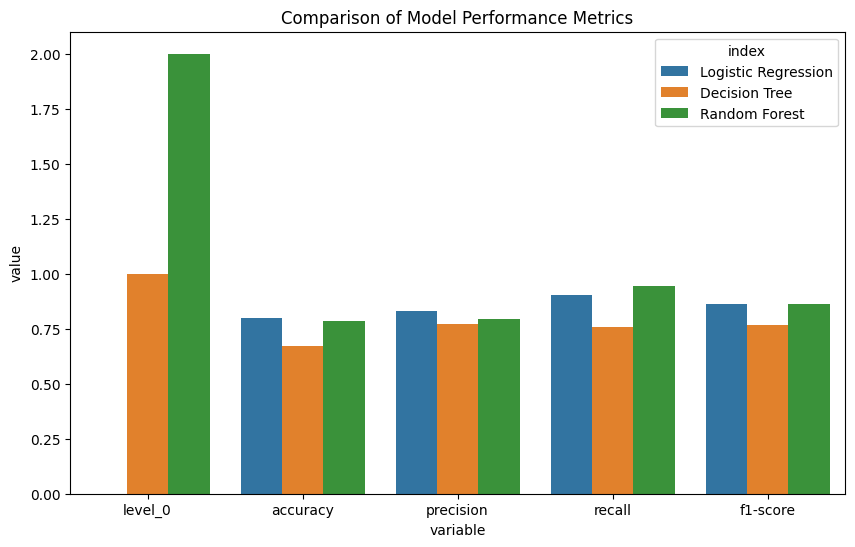

In [ ]:
results_df = results_df.reset_index()
results_df_melted = results_df.melt(id_vars='index', var_name='variable', value_name='value')
plt.figure(figsize=(10, 6))
sns.barplot(x='variable', y='value', hue='index', data=results_df_melted)
plt.title("Comparison of Model Performance Metrics")
plt.show()

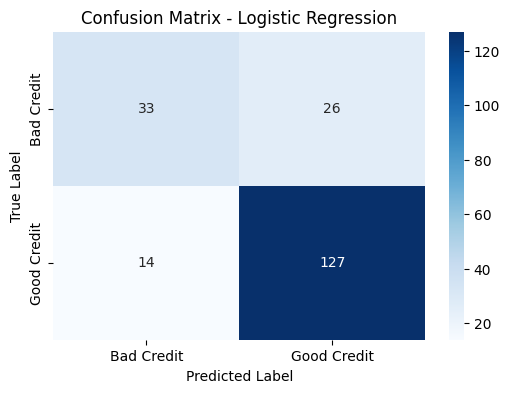

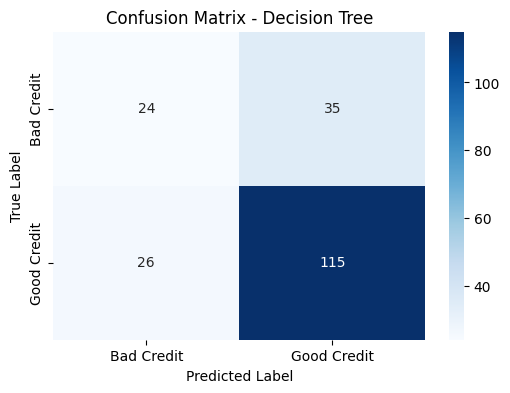

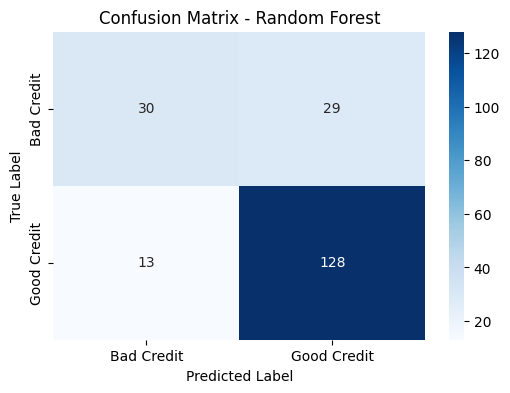

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Redefine the models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Train the models (assuming X_train and y_train are available from previous cells)
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad Credit', 'Good Credit'], yticklabels=['Bad Credit', 'Good Credit'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()